# LitPop class

## Introduction

`LitPop` is an [Exposures](climada_entity_Exposures.ipynb)-type class. It is used to initiate gridded exposure data with estimates of either asset value, economic activity or population based on nightlight intensity and population count data. 

### Background

The modeling of economic disaster risk on a global scale requires high-resolution maps of exposed asset values. We have developed a generic and scalable method to downscale national asset value estimates proportional to a combination of nightlight intensity ("Lit") and population data ("Pop"). 

Asset exposure value is disaggregated to the grid points proportionally to $Lit^m Pop^n$, computed at each grid cell:


$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \mathbb{R}^{+}$ (Default values are $m=n=1$).


For more information please refer to the related publication (https://doi.org/10.5194/essd-12-817-2020) and data archive (https://doi.org/10.3929/ethz-b-000331316).

*How to cite:* Eberenz, S., Stocker, D., Röösli, T., and Bresch, D. N.: _Asset exposure data for global physical risk assessment_, Earth Syst. Sci. Data, 12, 817–833, https://doi.org/10.5194/essd-12-817-2020, 2020.


### Input data

*Note*: All required data except for the population data from Gridded Population of the World (GPW) is downloaded automatically when an `LitPop.set_*` method is called.

**Warning**: Processing the data for the first time can take up huge amounts of RAM (>10 GB), depending on country or region size. Consider using the [wrapper function](climada_util_api_client.ipynb#The-wrapper-functions-client.get_litpop()) of the [data API](climada_util_api_client.ipynb) to download readily computed LitPop exposure data for default values ($n = m = 1$) on demand.

#### Nightlight intensity
Black Marble annual composite of the VIIRS day-night band (Grayscale) at 15 arcsec resolution is downloaded from the NASA Earth Observatory: https://earthobservatory.nasa.gov/Features/NightLights (available for 2012 and 2016 at 15 arcsec resolution (~500m)).
The first time a nightlight image is used, it is downloaded and stored locally. This might take some time.

#### Population count
Gridded Population of the World (GPW), v4: Population Count, v4.10, v4.11 or later versions (2000, 2005, 2010, 2015, 2020), available from http://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse.

The GPW file of the year closest to the requested year (`reference_year`) is required.
To download GPW data a (free) login for the NASA SEDAC website is required.

Direct download links are avilable, also for older versions, i.e.:
- v4.11: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev11/gpw-v4-population-count-rev11_2015_30_sec_tif.zip
- v4.10: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev10/gpw-v4-population-count-rev10_2015_30_sec_tif.zip, 
- Overview over all versions of GPW v.4: https://beta.sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse

The population data from GWP needs to be downloaded manually as TIFF from this site and placed in the `SYSTEM_DIR` folder of your climada installation.

### Downloading existing LitPop asset exposure data

The easiest way to download existing data is using the [wrapper function](climada_util_api_client.ipynb#The-wrapper-functions-client.get_litpop()) of the [data API](climada_util_api_client.ipynb).

Readily computed LitPop asset exposure data based on $Lit^1Pop^1$ for 224 countries, distributing produced capital / non-financial wealth of 2014 at a resolution of 30 arcsec can also be downloaded from the ETH Research Repository: https://doi.org/10.3929/ethz-b-000331316.
The dataset contains gridded data for more than 200 countries as CSV files.

## Attributes

The `LitPop` class inherits from [`Exposures`](climada_entity_Exposures.ipynb#Exposures-class).
It adds the following attributes:

        exponents : Defining powers (m, n) with which nightlights and population go into Lit**m * Pop**n.
        fin_mode : Socio-economic indicator to be used as total asset value for disaggregation.
        gpw_version : Version number of GPW population data, e.g. 11 for v4.11

### fin_mode
The choice of `fin_mode` is crucial. Implemented choices are:
* `'pc'`: produced capital (Source: World Bank), incl. manufactured or built assets such as machinery, equipment, and physical structures. The pc-data is stored in the subfolder *data/system/Wealth-Accounts_CSV/*. Source: https://datacatalog.worldbank.org/dataset/wealth-accounting
* `'pop'`: population count (source: GPW, same as gridded population)
* `'gdp'`: gross-domestic product (Source: World Bank)
* `'income_group'`: gdp multiplied by country's income group+1
* `'nfw'`: non-financial household wealth (Source: Credit Suisse)
* `'tw'`: total household wealth (Source: Credit Suisse)
* `'norm'`: normalized, total value of country or region is 1.
* `'none'`: None – LitPop per pixel is returned unchanged

Regarding the GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

## Key Methods
* `from_countries`: set exposure for one or more countries, see section `from_countries` below.
* `from_nightlight_intensity`: wrapper around `from_countries` and `from_shape` to load nightlight data to exposure.
* `from_population`: wrapper around `from_countries` and `from_shape_population` to load pure population data to exposure. This can be used to initiate a population exposure set.
* `from_shape_and_countries`: given a shape and a list of countries, exposure is initiated for the countries and then cropped to the shape. See section *Set custom shapes* below.
* `from_shape`: given any shape or geometry and an estimate of total values, exposure is initiated for the shape directly. See section *Set custom shapes* below.


In [2]:
# Import class LitPop:
from pinar.entity import LitPop

## `from_countries`
In the following, we will create exposure data sets and plots for a variety of countries, comparing different settings.
### Default Settings
Per default, the exposure entity was initiated using the default parameters, i.e. a resolution of 30 arcsec, produced capital 'pc' as total asset value and using the exponents $(1, 1)$.

In [ ]:
# Initiate a default LitPop exposure entity for Switzerland and Liechtenstein (ISO3-Codes 'CHE' and 'LIE'):
try:
    exp = LitPop.from_countries(['CHE', 'Liechtenstein']) # you can provide either single countries or a list of countries
except FileExistsError as err:
    print("Reason for error: The GPW population data has not been downloaded, c.f. section 'Input data' above.")
    raise err
exp.plot_scatter();

# Note that `exp.gdf.region_id` is a number identifying each country:
print('\n Region IDs (`region_id`) in this exposure:')
print(exp.gdf.region_id.unique())

### fin_mode, resolution and exponents
Instead on produced capital, we can also downscale other available macroeconomic indicators as estimates of asset value.
The indicator can be set via the parameter `fin_mode`, either to 'pc', 'pop', 'gdp', 'income_group', 'nfw', 'tw', 'norm', or 'none'.
See descriptions of each alternative above in the introduction.

We can also change the resolution via `res_arcsec` and the `exponents`.

The default resolution is 30 arcsec $\approx$ 1 km.
A resolution of 3600 arcsec = 1 degree corresponds to roughly 110 km close to the equator.

## `from_population`

Let's initiate an exposure instance with the financial mode "income_group" and at a resolution of 120 arcsec (roughly 4 km).

In [ ]:
# Initiate a LitPop exposure entity for Costa Rica with varied resolution, fin_mode, and exponents:
exp = LitPop.from_countries('Costa Rica', fin_mode='income_group', res_arcsec=120, exponents=(1,1)) # change the parameters and see what happens...
# exp = LitPop.from_countries('Costa Rica', fin_mode='gdp', res_arcsec=90, exponents=(3,0)) # example of variation
exp.plot_raster(); # note the log scale of the colorbar
exp.plot_scatter();

## Reference year

Additionally, we can change the year our exposure is supposed to represent. For this, nightlight and population data  are used that are closest to the requested years. Macroeconomic indicators like produced capital are interpolated from available data or scaled proportional to GDP.

Let's load a population exposure map for Switzerland in 2000 and 2021 with a resolution of 300 arcsec:

In [ ]:
# You may want to check if you have downloaded dataset Gridded Population of the World (GPW), v4: Population Count, v4.11
# (2000 and 2020) first
pop_2000 = LitPop.from_countries('CHE', fin_mode='pop', res_arcsec=300, exponents=(0,1), reference_year=2000)
# Alternatively, we ca use `from_population`:
pop_2021 = LitPop.from_population(countries='Switzerland', res_arcsec=300, reference_year=2021)
# Since no population data for 2021 is available, the closest data point, 2020, is used (see LOGGER.warning)
pop_2000.plot_scatter();
pop_2021.plot_scatter();
"""Note the difference in total values on the color bar."""

## `from_nightlight_intensity` and `from_population`

These wrapper methods can be used to produce exposures that are showing purely nightlight intensity or purely population count.

In [ ]:
res = 30 # If you don't get an output after a very long time with country = "MEX", try with res = 100
country = 'JAM' # Try different countries, i.e. 'JAM', 'CHE', 'RWA', 'MEX'
markersize = 4 # for plotting
buffer_deg=.04

exp_nightlights = LitPop.from_nightlight_intensity(countries=country, res_arcsec=res) # nightlight intensity
exp_nightlights.plot_hexbin(linewidth=markersize, buffer=buffer_deg);
# Compare to the population map:
exp_population = LitPop().from_population(countries=country, res_arcsec=res)
exp_population.plot_hexbin(linewidth=markersize, buffer=buffer_deg);
# Compare to default LitPop exposures:
exp = LitPop.from_countries(countries=country, res_arcsec=res)
exp.plot_hexbin(linewidth=markersize, buffer=buffer_deg);

For **Switzerland**, population is resolved on the 3rd administrative level, with 2538 distinct geographical units. Therefore, the purely population-based map is highly resolved.

For **Jamaica**, population is only resolved on the 1st administrative level, with only 14 distinct geographical units. Therefore, the purely population-based map shows large monotonous patches. The combination of Lit and Pop results in a concentration of asset value estimates around the capital city Kingston.

## Init LitPop-Exposure from custom shapes <a class="anchor" id="custom_shape"></a>

The methods `LitPop.from_shape_and_countries` and `LitPop.from_shape` initiate a LitPop-exposure instance for a given custom shape instead of a country. This can be used to initiate exposure for admin1-regions, i.e. cantons, states, districts, - but also for bounding boxes etc.

The difference between the two methods is that for `from_shape_and_countries`, the exposure for one or more whole countries is initiated first and then it is cropped to the shape. Please make sure that the shape is contained in the given countries.
With `from_shape`, the shape is initiated directly which is much more resource efficient but requires a `total_value` to be provided by the user.

A population exposure for a custom shape can be initiated directly via `from_population` without providing `total_value`.

### Example: State of Florida <a class="anchor" id="florida"></a>

Using `LitPop.from_shape_and_countries` and `LitPop.from_shape` we initiate LitPop exposures for Florida:

In [ ]:
import time
import pinar.util.coordinates as u_coord
import pinar.entity.exposures.litpop as lp

country_iso3a = 'USA'
state_name = 'Florida'
reslution_arcsec = 600
"""First, we need to get the shape of Florida:"""
admin1_info, admin1_shapes = u_coord.get_admin1_info(country_iso3a)
admin1_info = admin1_info[country_iso3a]
admin1_shapes = admin1_shapes[country_iso3a]
admin1_names = [record['name'] for record in admin1_info]
print(admin1_names)
for idx, name in enumerate(admin1_names):
    if admin1_names[idx]==state_name:
        break
print('Florida index: ' + str(idx))

"""Secondly, we estimate the `total_value`"""
# `total_value` required user input for `from_shape`, here we assume 5% of total value of the whole USA:
total_value = 0.05 * lp._get_total_value_per_country(country_iso3a, 'pc', 2020)

"""Then, we can initiate the exposures for Florida:"""
start = time.process_time()
exp = LitPop.from_shape(admin1_shapes[idx], total_value, res_arcsec=600, reference_year=2020)
print(f'\n Runtime `from_shape` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter(vmin=100, buffer=.5);


In [ ]:
# `from_shape_and_countries` does not require `total_value`, but is slower to compute than `from_shape`,
# because first, the exposure for the whole USA is initiated:
start = time.process_time()
exp = LitPop.from_shape_and_countries(admin1_shapes[idx], country_iso3a, res_arcsec=600, reference_year=2020)
print(f'\n Runtime `from_shape_and_countries` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter(vmin=100, buffer=.5);
"""Note the differences in computational speed and total value between the two approaches"""

## Example: Zurich city area

You can also define your own shape as a Polygon:

In [ ]:
import time
from shapely.geometry import Polygon

"""initiate LitPop exposures for a geographical box around the city of Zurich:"""
bounds = (8.41, 47.25, 8.70, 47.47) # (min_lon, max_lon, min_lat, max_lat)
total_value=1000 # required user input for `from_shape`, here we just assume USD 1000 of total value
shape = Polygon([
                (bounds[0], bounds[3]),
                (bounds[2], bounds[3]),
                (bounds[2], bounds[1]),
                (bounds[0], bounds[1])
                ])
import time
start = time.process_time()
exp = LitPop.from_shape(shape, total_value)
print(f'\n Runtime `from_shape` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter();
# `from_shape_and_countries` does not require `total_value`, but is slower to compute:
start = time.process_time()
exp = LitPop.from_shape_and_countries(shape, 'Switzerland')
print(f'\n Runtime `from_shape_and_countries` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter();
"""Note the difference in total value between the two exposure sets!"""

"""For comparison, initiate population exposure for a geographical box around the city of Zurich:"""
start = time.process_time()
exp_pop = LitPop.from_population(shape=shape)
print(f'\n Runtime `from_population` : {time.process_time() - start:1.2f} sec.\n')
exp_pop.plot_scatter();

"""Population exposure for a custom shape can be initiated directly via `set_population` without providing `total_value`"""

## Sub-national (admin-1) GDP as intermediate downscaling layer <a class="anchor" id="admin1"></a>

In order to improve downscaling for countries with large regional differences within, a subnational breakdown of GDP can be used as an intermediate downscaling layer wherever available.

The sub-national (admin-1) GDP-breakdown needs to be added manually as a ".xls"-file to the folder `data/system/GSDP` in the PINAR-directory. Currently, such data is provided for more than 10 countries, including USA, India, and China.

The xls-file requires at least the following columns (with names specified in row 1):
- `State_Province`: Names of admin-1 regions, i.e. states, cantons, provinces. Names need to match the naming of admin-1 shapes in the data used by the python package `cartopy.io` (c.f. `shapereader.natural_earth(name='admin_1_states_provinces')`)
- `GSDP_ref`: value of sub-national GDP to be used (absolute or relative values)
- `Postal`, optional: Alternative identifier of region, if names do not match with cartopy. Needs to correspond to the Postal-identifiers used in the shapereader of `cartopy.io`.

Please note that while admin1-GDP will per definition improve the downscaling of *GDP*, it might not necessarily improve the downscaling quality for other asset bases like produced capital (pc).
### How To:
The intermediate downscaling layer can be activated with the parameter `admin1_calc=True`.


In [ ]:
# Initiate GDP-Entity for Switzerland, with and without admin1_calc:

ent_adm0 = LitPop.from_countries('CHE', res_arcsec=120, fin_mode='gdp', admin1_calc=False)
ent_adm0.set_geometry_points()

ent_adm1 = LitPop.from_countries('CHE', res_arcsec=120, fin_mode='gdp', admin1_calc=True)

ent_adm0.check()
ent_adm1.check()
print('Done.')

admin-0: First figure
admin-1: Second figure


'Do you spot the small differences in Graubünden (eastern Switzerland)?'

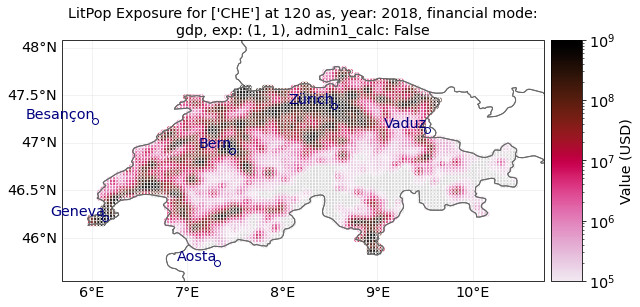

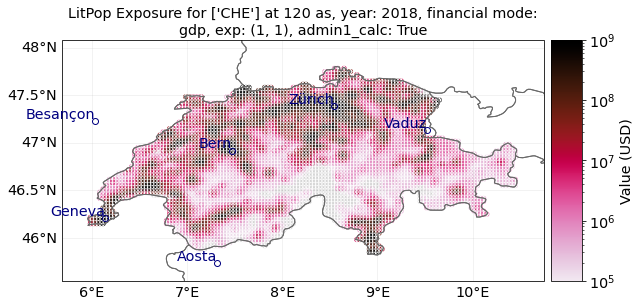

In [10]:
# Plotting:
from matplotlib import colors
norm=colors.LogNorm(vmin=1e5, vmax=1e9) # setting range for the log-normal scale
markersize = 5
ent_adm0.plot_hexbin(buffer=.3, norm=norm, linewidth=markersize);
ent_adm1.plot_hexbin(buffer=.3, norm=norm, linewidth=markersize);

print('admin-0: First figure')
print('admin-1: Second figure')
'''Do you spot the small differences in Graubünden (eastern Switzerland)?'''